In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [4]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\train (1).csv",usecols=['Age','Fare','Survived'])

In [8]:
df.dropna(inplace=True) # to drop missing values row

In [6]:
df.shape

(714, 3)

In [7]:
df.sample(5)

,Survived,Age,Fare
68,1,17.0,7.9250
212,0,22.0,7.2500
591,1,52.0,78.2667
661,0,40.0,7.2250
262,0,52.0,79.6500


In [9]:
# Extracting X and y
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [12]:
clf = DecisionTreeClassifier()

In [13]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [14]:
accuracy_score(y_test,y_pred)

0.6363636363636364

In [15]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6261150234741784

In [20]:
kbin_age = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans',subsample=None)
kbin_fare = KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='kmeans',subsample=None)

In [21]:
trf=ColumnTransformer([('first',kbin_age,[0]),('second',kbin_fare,[1])])

In [22]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [24]:
trf.named_transformers_['first'].n_bins_ # you can use various parameters here from documentation

array([5])

In [25]:
output=pd.DataFrame({'age':X_train['Age'],'age_trf':X_train_trf[:,0],'fare':X_train['Fare'],'fare_trf':X_train_trf[:,1]})

In [26]:
output['age_labels']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [27]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
676,24.50,1.0,8.0500,0.0,"(12.696, 27.028]","(0.0, 42.424]"
576,34.00,2.0,13.0000,0.0,"(27.028, 39.354]","(0.0, 42.424]"
755,0.67,0.0,14.5000,0.0,"(0.42, 12.696]","(0.0, 42.424]"
484,25.00,1.0,91.0792,1.0,"(12.696, 27.028]","(42.424, 100.624]"
30,40.00,3.0,27.7208,0.0,"(39.354, 54.215]","(0.0, 42.424]"


In [28]:
clf=DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [29]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [30]:
X_trf=trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6303012519561816

In [33]:
def discretize(bins,strategy):
    kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf=ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('After')
    
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title('After')
    
    plt.show()

0.6345266040688575


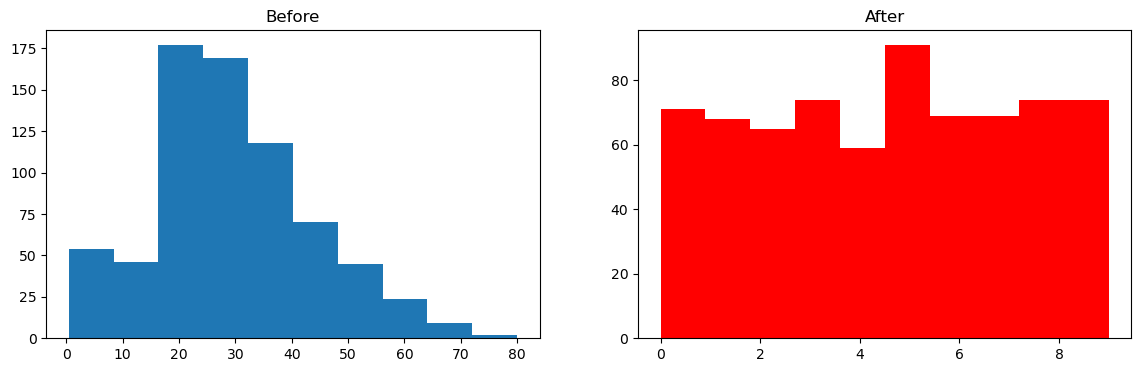

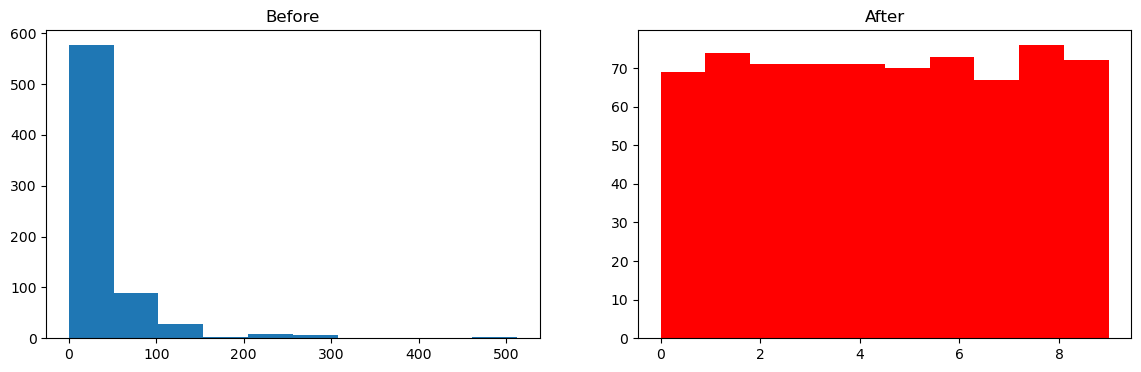

In [34]:
discretize(10,'quantile')

In [37]:
# In Binarization we convert the numerical data into binary (0,1)
# used in image resolution
# class used is binarizer

In [54]:
df2=pd.read_csv(r"C:\Users\ASUS\Downloads\train (1).csv",usecols=['Age','Fare','Survived','Parch','SibSp'])

In [55]:
df2.dropna(inplace=True)

In [56]:
df2['Family']=df2['SibSp'] + df2['Parch']

In [65]:
df2

,Survived,Age,SibSp,Parch,Fare,Family
0,0,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,1
2,1,26.0,0,0,7.9250,0
3,1,35.0,1,0,53.1000,1
4,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,5
886,0,27.0,0,0,13.0000,0
887,1,19.0,0,0,30.0000,0
889,1,26.0,0,0,30.0000,0


In [57]:
X2=df2.drop(columns=['Survived'])
y2=df2['Survived']

In [58]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2,random_state=42)

In [59]:
# applying binarization

from sklearn.preprocessing import Binarizer

In [62]:
trf2=ColumnTransformer([
    ('bin',Binarizer(copy=False),['Family'])
],remainder='passthrough')

In [63]:
X_train_trf2 = trf2.fit_transform(X2_train)
X_test_trf2 = trf2.transform(X2_test)

In [66]:
pd.DataFrame(X_train_trf2,columns=['Family','Age','Fare','Parch','SibSp'])

,Family,Age,Fare,Parch,SibSp
0,1.0,31.0,1.0,1.0,20.5250
1,1.0,26.0,1.0,0.0,14.4542
2,1.0,30.0,1.0,0.0,16.1000
3,0.0,33.0,0.0,0.0,7.7750
4,0.0,25.0,0.0,0.0,13.0000
...,...,...,...,...,...
566,1.0,46.0,1.0,0.0,61.1750
567,0.0,25.0,0.0,0.0,13.0000
568,0.0,41.0,0.0,0.0,134.5000
569,1.0,33.0,1.0,1.0,20.5250


In [67]:
clf2=DecisionTreeClassifier()
clf2.fit(X_train_trf2,y2_train)
y_pred2=clf2.predict(X_test_trf2)

accuracy_score(y_test,y_pred2)

0.6223776223776224